In this notebook, I will use the previously generated eGRN models for the highly variable genes\
in the Zhu et al. single cell multiome dataset. Firstly, using differentially accessible regions\
in different cell types, I will extract the cell type specific networks from the global eGRN model.\
Then, I will perform SNP enrichment on these cell type-network-harboured regulatory elements.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [3]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [4]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [5]:
library(Signac)

In [6]:
library(Pando)


Attaching package: ‘Pando’


The following objects are masked from ‘package:Seurat’:

    GetAssay, VariableFeatures


The following objects are masked from ‘package:SeuratObject’:

    LayerData, VariableFeatures




In [7]:
Zhu_et_al_Pando_w_eGRNs <- 
    readRDS(here::here('..', '10_04_24', 'R_Objects', 'Zhu_et_al_Pando_w_eGRNs.RDS'))

In [8]:
Zhu_et_al_Pando_w_eGRNs

An object of class "GRNData"
Slot "grn":
A RegulatoryNetwork object based on 1014 transcription factors

1 inferred network: glm_network

Slot "data":
An object of class Seurat 
364381 features across 45549 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony


In [9]:
da_peaks_all <- 
    readRDS(here::here('..', '10_04_24', 'R_Objects', 'da_peaks_all_logfc_cutoff_0_1_minPCT_0_01.RDS'))

In [10]:
da_peaks_all %>% dim

[1] 482945      8

In [11]:
da_peaks_all %>% summary

     p_val             avg_log2FC         pct.1             pct.2        
 Min.   :0.000e+00   Min.   :0.1000   Min.   :0.00900   Min.   :0.00000  
 1st Qu.:0.000e+00   1st Qu.:0.7935   1st Qu.:0.01600   1st Qu.:0.00500  
 Median :0.000e+00   Median :1.3790   Median :0.02700   Median :0.00900  
 Mean   :3.841e-04   Mean   :1.5323   Mean   :0.05023   Mean   :0.02488  
 3rd Qu.:9.440e-07   3rd Qu.:2.1392   3rd Qu.:0.05400   3rd Qu.:0.02000  
 Max.   :1.000e-02   Max.   :5.9867   Max.   :0.68600   Max.   :0.56800  
                                                                         
   p_val_adj                                                cluster     
 Min.   :0.0000   glutamatergic neuron                          :76877  
 1st Qu.:0.0000   astrocyte                                     :76070  
 Median :0.0000   caudal ganglionic eminence derived interneuron:69502  
 Mean   :0.2450   medial ganglionic eminence derived interneuron:67280  
 3rd Qu.:0.2871   oligodendrocyte precursor

In [12]:
da_peaks_all %>% 
filter(p_val_adj < 0.05) %>% 
dim

[1] 348145      8

In [13]:
da_peaks_all %>% .$avg_log2FC %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1000  0.7935  1.3790  1.5323  2.1392  5.9867 

In [14]:
da_peaks_all_sig <- 
da_peaks_all %>% 
filter(p_val_adj < 0.05)

In [15]:
da_peaks_all_sig %>% dim

[1] 348145      8

In [17]:
da_peaks_all_sig %>% count(cluster) %>% print

                                          cluster     n
1                                endothelial cell   919
2                                       astrocyte 66003
3                                 oligodendrocyte 20477
4                                 microglial cell 38424
5          vascular associated smooth muscle cell  6399
6                          inhibitory interneuron 10183
7                                        pericyte  6641
8                            glutamatergic neuron 67860
9                               radial glial cell  5685
10                 oligodendrocyte precursor cell 42509
11                         neural progenitor cell  5881
12 medial ganglionic eminence derived interneuron 41459
13 caudal ganglionic eminence derived interneuron 35705


In [18]:
microglial_cells_DA_regions <- 
    da_peaks_all_sig %>% 
    filter(cluster %in% c('microglial cell'))

In [19]:
microglial_cells_DA_regions %>% dim

[1] 38424     8

In [20]:
glutamatergic_neuron_DA_regions <- 
    da_peaks_all_sig %>% 
    filter(cluster %in% c('glutamatergic neuron'))

In [21]:
glutamatergic_neuron_DA_regions %>% dim

[1] 67860     8

In [22]:
astrocytes_DA_regions <- 
    da_peaks_all_sig %>% 
    filter(cluster %in% c('astrocyte'))

In [23]:
astrocytes_DA_regions %>% dim

[1] 66003     8

In [24]:
oligodendrocyte_DA_regions <- 
    da_peaks_all_sig %>%  
    filter(cluster %in% c('oligodendrocyte'))

In [25]:
oligodendrocyte_DA_regions %>% dim

[1] 20477     8

In [27]:
# now, create a copy of global network to filter in cell type specific networks:

microglial_cells_eGRNs <- Zhu_et_al_Pando_w_eGRNs

In [28]:
microglial_cells_DA_regions %>% head

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,pct_diff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
chr1-26541541-265431601,0,4.144248,0.361,0.027,0,microglial cell,chr1-26541541-26543160,0.334
chr9-62798866-62802754,0,1.623945,0.511,0.214,0,microglial cell,chr9-62798866-62802754,0.297
chr5-179791833-179794163,0,2.909141,0.347,0.060,0,microglial cell,chr5-179791833-179794163,0.287
chr10-119542064-1195444691,0,3.101624,0.323,0.051,0,microglial cell,chr10-119542064-119544469,0.272
chr17-82230608-82232186,0,2.784015,0.334,0.062,0,microglial cell,chr17-82230608-82232186,0.272
chr21-34888473-34890399,0,2.367236,0.351,0.085,0,microglial cell,chr21-34888473-34890399,0.266


In [29]:
microglial_cells_DA_regions %>% rownames %>% duplicated %>% table

.
FALSE 
38424 

In [30]:
microglial_cells_eGRNs@grn@networks$glm_network@coefs <- 
                microglial_cells_eGRNs@grn@networks$glm_network@coefs %>% 
                            filter(region %in% rownames(microglial_cells_DA_regions))

In [31]:
microglial_cells_eGRNs %>% coef %>% dim

[1] 3682   10

In [32]:
coef(microglial_cells_eGRNs) %>% head

tf,target,region,term,estimate,std_err,statistic,pval,padj,corr
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZFPM2,TMSB4X,chrX-12894122-12894337,ZFPM2:chrX_12894122_12894337,0.005019486,0.009711519,0.5168590,0.60525713,0.8304228,-0.1484440
ZNF618,TMSB4X,chrX-12894122-12894337,ZNF618:chrX_12894122_12894337,0.025768830,0.018832401,1.3683242,0.17121745,0.4425753,0.1004045
ZNF521,TMSB4X,chrX-12894122-12894337,ZNF521:chrX_12894122_12894337,-0.028026360,0.020666086,-1.3561523,0.17505751,0.4481728,-0.1130517
BCL11A,TMSB4X,chrX-12896965-12897213,BCL11A:chrX_12896965_12897213,0.037299935,0.017931959,2.0800814,0.03752371,0.1670923,0.1835136
EOMES,TMSB4X,chrX-12896965-12897213,EOMES:chrX_12896965_12897213,-0.018887089,0.056262556,-0.3356955,0.73710203,0.8980980,0.1137810
ZFPM2,TMSB4X,chrX-12896965-12897213,ZFPM2:chrX_12896965_12897213,-0.015070122,0.013339719,-1.1297181,0.25860106,0.5556070,-0.1484440


In [33]:
# Find TF modules:

microglial_cells_eGRNs  <- find_modules(
    microglial_cells_eGRNs, 
    p_thresh = 0.1,
    nvar_thresh = 2, 
    min_genes_per_module = 1, 
    rsq_thresh = 0.05
)

Found 151 TF modules



In [34]:
list.files(here::here())

[1] "bash_scripts"                                                                           
 [2] "network_visualization_functions_simplified.r"                                           
 [3] "network_visualization_functions.r"                                                      
 [4] "PART_1_Prepare_endothelial_gene_list_for _Pando_eGRN_inference.ipynb"                   
 [5] "PART_2A_Exploration_of_eGRNs_for_each_chunk_of_target_genes_to_assess_consistency.ipynb"
 [6] "PART_2B_Concatanate_the_network_objects_of_chunked_genes_and_apply_FDR.ipynb"           
 [7] "PART_3_Comparison_of_Zhu_et_al_&_Mannens_et_al_endothelial_eGRNs.ipynb"                 
 [8] "PART_4_SNP_overrepresentation_analysis_on_endothelial_eGRNS_Zhu_et_al_data.ipynb"       
 [9] "PART_5_cell_type_specific_eGRN_wise_SNP_enrichment_analysis.ipynb"                      
[10] "R_Objects"                                                                              
[11] "SNP_enrichment_and_plotting_functions.R"

In [35]:
source('network_visualization_functions.r')

make sure you installed the GGally, network, igraph and ggraph packages :)

First option: One can directly use only the node_names parameter to specify 
          the gene names to visualize in the graph

Second option: Use TF-names and/or target genes parameters 
         to visualize their connections

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


‘network’ 1.18.2 (2023-12-04), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘igraph’


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following object is masked from ‘p

 Network attributes:
  vertices = 407 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 544 
    missing edges= 0 
    non-missing edges= 544 

 Vertex attribute names: 
    vertex.names 

No edge attributes


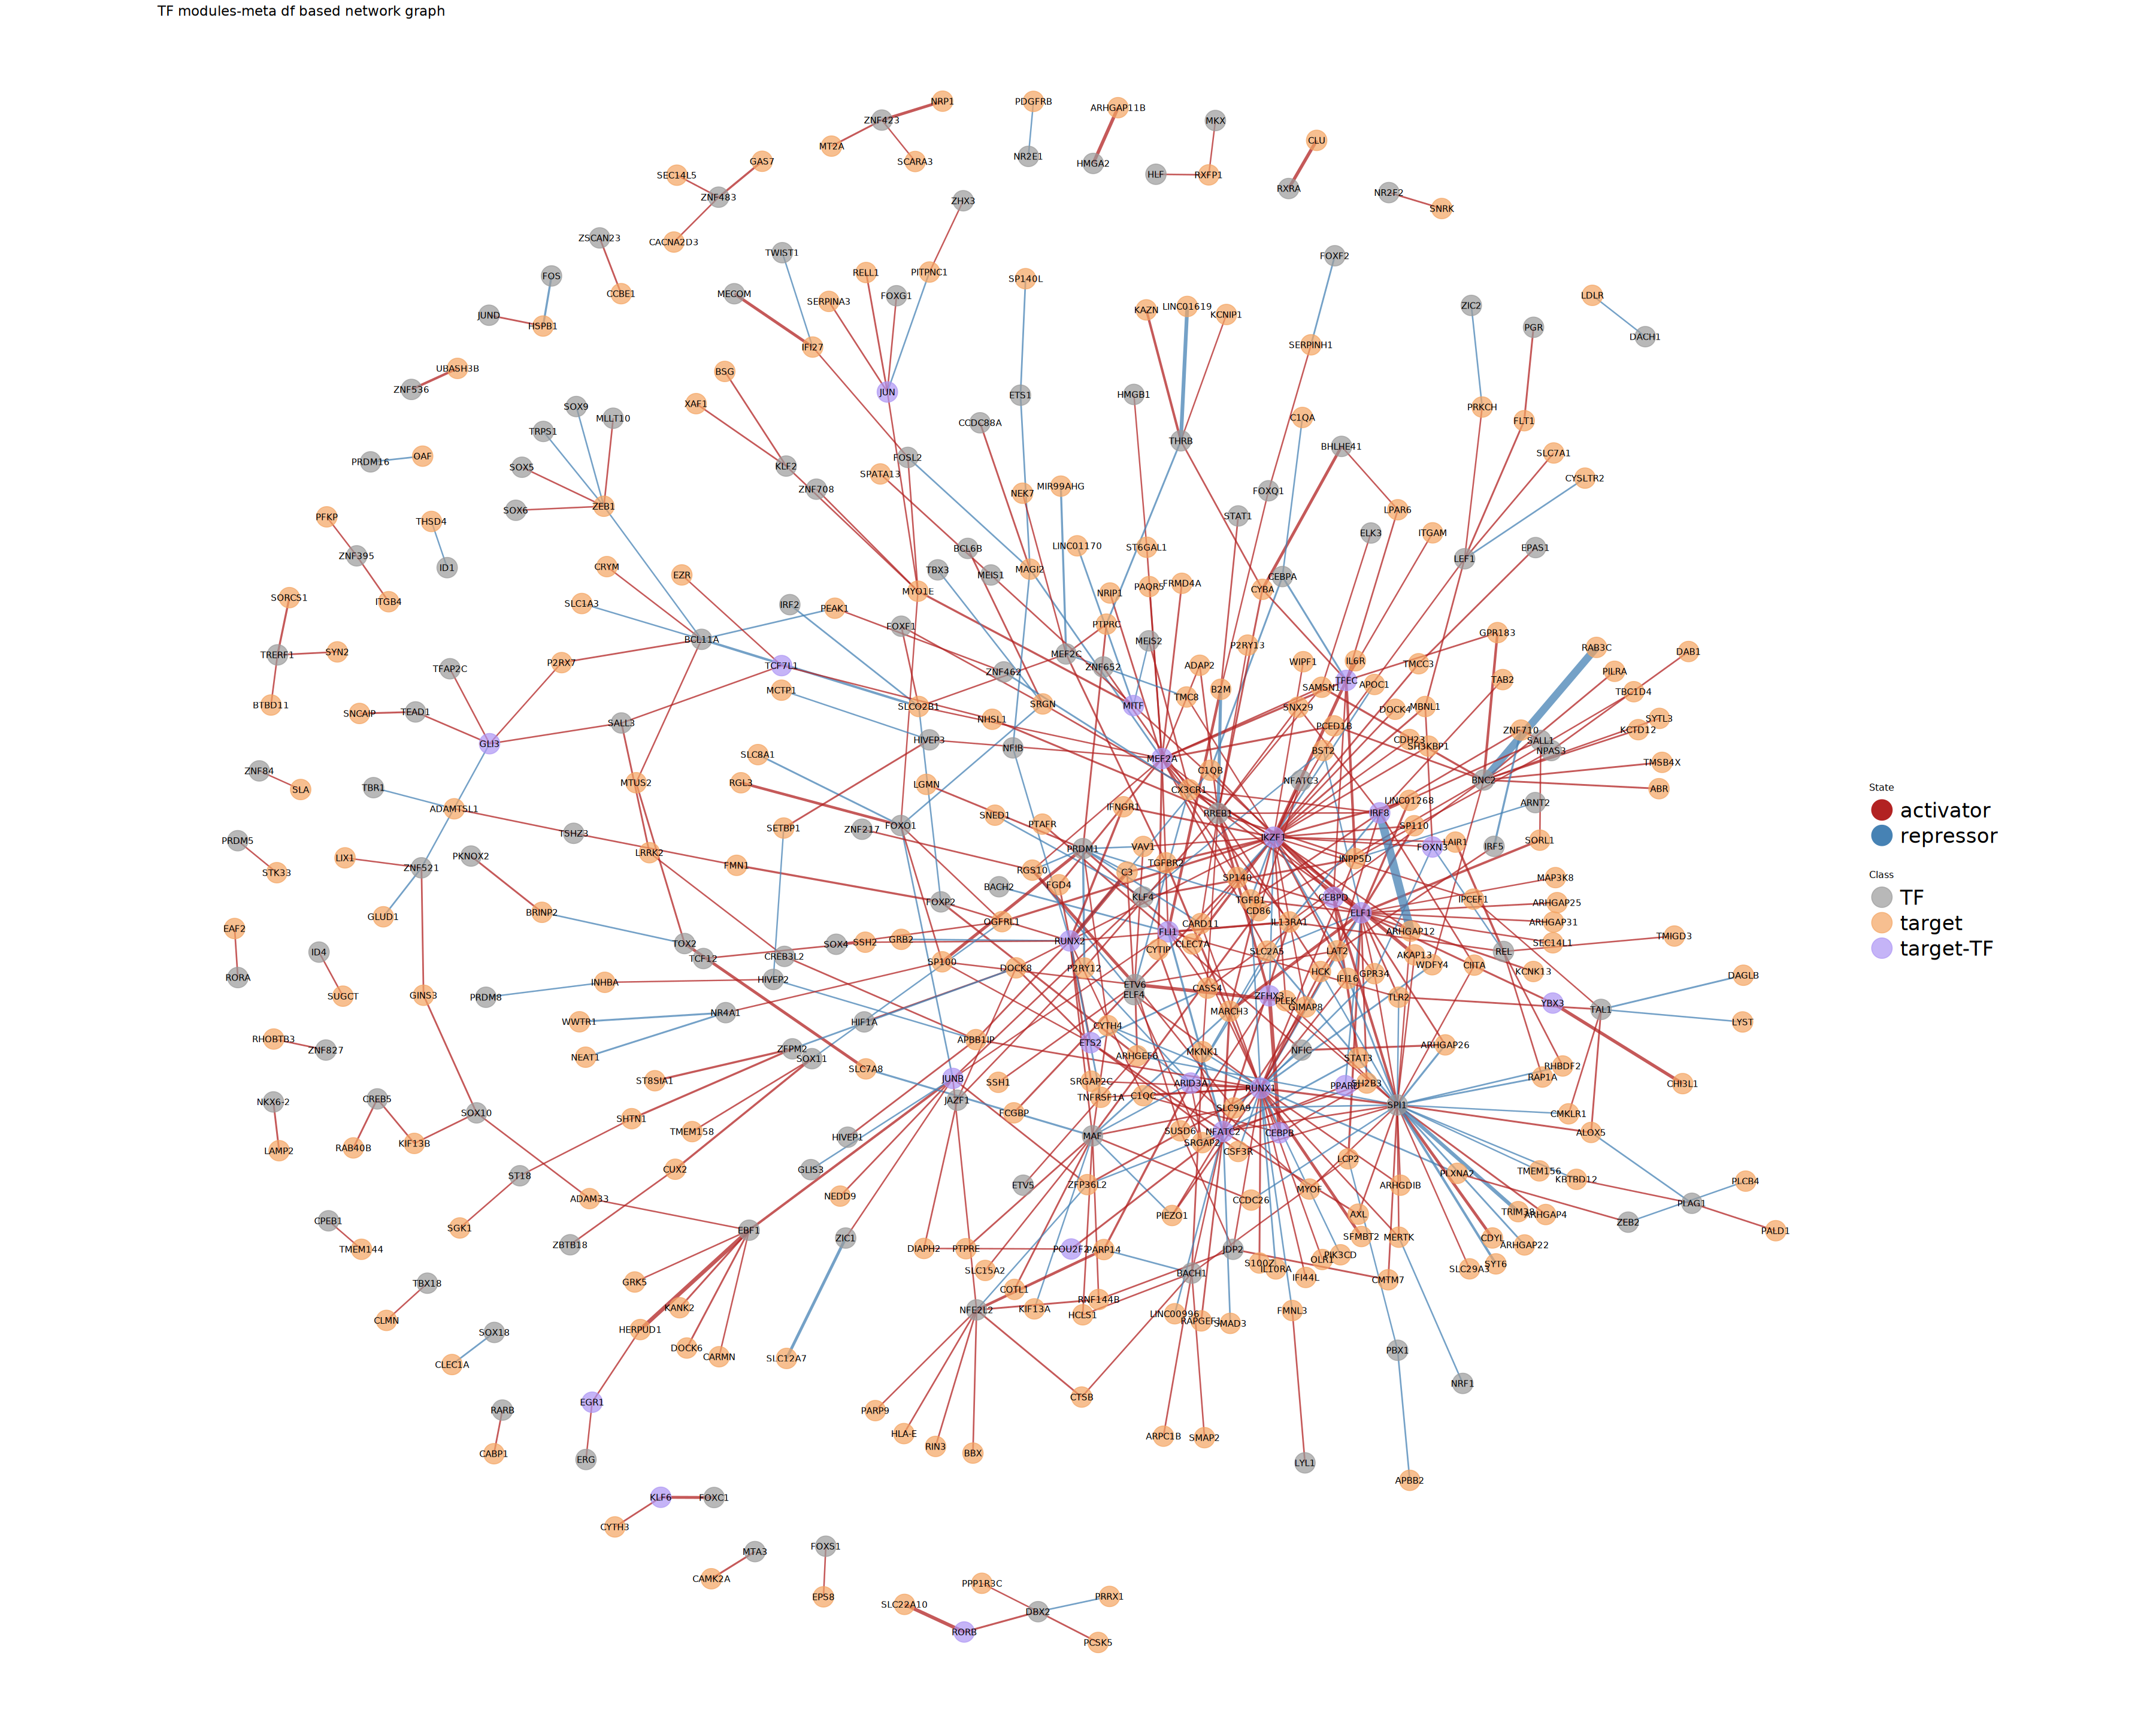

In [38]:
options(repr.plot.width = 30, repr.plot.height = 24)

vis_network_w_GGNET2(meta_DF = microglial_cells_eGRNs %>% NetworkModules %>% .@meta)

In [39]:
microglial_cells_eGRNs %>% NetworkModules %>% .@meta %>% summary

      tf               target             estimate            n_regions    
 Length:544         Length:544         Min.   :-0.9956105   Min.   :1.000  
 Class :character   Class :character   1st Qu.: 0.0007053   1st Qu.:1.000  
 Mode  :character   Mode  :character   Median : 0.0220804   Median :1.000  
                                       Mean   : 0.0242790   Mean   :1.458  
                                       3rd Qu.: 0.0431056   3rd Qu.:2.000  
                                       Max.   : 1.1258215   Max.   :4.000  
    n_genes          n_tfs        regions               pval          
 Min.   : 1.00   Min.   :1.00   Length:544         Min.   :0.000e+00  
 1st Qu.: 3.00   1st Qu.:1.00   Class :character   1st Qu.:2.329e-05  
 Median : 7.00   Median :2.00   Mode  :character   Median :1.168e-03  
 Mean   :12.19   Mean   :2.86                      Mean   :4.156e-03  
 3rd Qu.:18.00   3rd Qu.:4.00                      3rd Qu.:7.238e-03  
 Max.   :35.00   Max.   :8.00             

In [55]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mvbj21lcf387dgs04d29n0sxrydq03a6-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] Pando_1.1.1        Signac_1.14.0      Seurat_5.1.0       SeuratObject_5.0.2
 [5] sp_2.1-4           lubridate_1.9.3    forcats_1.0.0      stringr_1.5.1     
 [9] dplyr_1.1.4        purrr